In [6]:
import math
import time

num = int(input("pick a number: "))
print(f"\n{'='*60}")
print(f"The number to factor is: {num}")
print(f"{'='*60}")

# Quick checks before starting the algorithm
print("\n[Step 1] Checking for simple cases...")
check_start = time.time()

# Check if even
if num % 2 == 0:
    check_end = time.time()
    print(f"✓ {num} is EVEN!")
    print(f"✓ Factor found immediately: 2 and {num // 2}")
    print(f"✓ Time: {check_end - check_start:.10f} seconds")
    exit()
else:
    print(f"  → {num} is odd, continuing...")

# Check if perfect power (n = a^b)
print("\n[Step 2] Checking if it's a perfect power (a^b)...")
for b in range(2, int(math.log2(num)) + 1):
    a = round(num ** (1/b))
    if a ** b == num:
        check_end = time.time()
        print(f"✓ {num} is a perfect power: {a}^{b}")
        print(f"✓ Base factor: {a}")
        print(f"✓ Time: {check_end - check_start:.10f} seconds")
        exit()
print(f"  → Not a perfect power, using Shor's algorithm...")

print(f"\n{'='*60}")
print("Starting Shor's Algorithm (Classical Simulation)")
print(f"{'='*60}")

st = time.time()
a = 2
max_a = min(num, 100)

while a < max_a:
    print(f"\n{'─'*60}")
    print(f"[Attempt with a = {a}]")
    print(f"{'─'*60}")
    
    # Calculate GCD
    gcd_start = time.time()
    print(f"  → Calculating GCD({a}, {num})...")
    gcd_a_num = math.gcd(a, num)
    gcd_end = time.time()
    print(f"  → GCD({a}, {num}) = {gcd_a_num}")
    print(f"  → GCD calculation time: {gcd_end - gcd_start:.10f} seconds")
    
    if gcd_a_num != 1:
        et = time.time()
        other_factor = num // gcd_a_num
        print(f"\n  ✓ Condition: 'Is GCD != 1?' → YES")
        print(f"  ✓ Factor found via GCD: {gcd_a_num} and {other_factor}")
        print(f"\n{'='*60}")
        print(f"SUCCESS! Factors are: {gcd_a_num} × {other_factor} = {num}")
        print(f"Total time taken: {et - st:.10f} seconds")
        print(f"{'='*60}")
        break
    else:
        print(f"  → Condition: 'Is GCD != 1?' → NO")
        print(f"  → GCD is 1, need to find order r...")
    
    # Find order r with optimized limit
    print(f"\n  [Finding order r]")
    print(f"  → Looking for smallest r where {a}^r mod {num} = 1...")
    r_start = time.time()
    r = 1
    found_r = False
    max_r = min(num, 10000)
    
    while r <= max_r:
        result = pow(a, r, num)
        if r <= 10 or r % 100 == 0:  # Print progress
            print(f"    • Testing r = {r}: {a}^{r} mod {num} = {result}")
        if result == 1:
            r_end = time.time()
            print(f"  ✓ Found order r = {r}! ({a}^{r} mod {num} = 1)")
            print(f"  ✓ Order finding time: {r_end - r_start:.10f} seconds")
            found_r = True
            break
        r += 1
    
    if not found_r:
        r_end = time.time()
        print(f"  ✗ Could not find order r within limit ({max_r})")
        print(f"  ✗ Time spent searching: {r_end - r_start:.10f} seconds")
        print(f"  → Moving to next value of a...")
        a += 1
        continue
    
    # Check if r is even
    print(f"\n  → Checking if r is even...")
    if r % 2 != 0:
        print(f"  ✗ Condition: 'Is r even?' → NO (r = {r} is odd)")
        print(f"  → Cannot proceed with this a, trying next value...")
        a += 1
        continue
    else:
        print(f"  ✓ Condition: 'Is r even?' → YES (r = {r})")
    
    # Calculate potential factors
    print(f"\n  [Calculating potential factors]")
    factor_start = time.time()
    print(f"  → Computing x = {a}^({r}//2) mod {num}...")
    x = pow(a, r // 2, num)
    factor_calc_time = time.time() - factor_start
    print(f"  → x = {a}^{r//2} mod {num} = {x}")
    print(f"  → Calculation time: {factor_calc_time:.10f} seconds")
    
    # Check if x = ±1 mod num (would give trivial factors)
    print(f"\n  → Checking if x = ±1 mod {num}...")
    if x == 1:
        print(f"  ✗ x = 1, this gives trivial factors")
        print(f"  → Trying next value of a...")
        a += 1
        continue
    elif x == num - 1:
        print(f"  ✗ x = {num - 1} (which is -1 mod {num}), gives trivial factors")
        print(f"  → Trying next value of a...")
        a += 1
        continue
    else:
        print(f"  ✓ x is not ±1, continuing...")
    
    gcd_final_start = time.time()
    print(f"\n  → Calculating GCD(x+1, {num}) and GCD(x-1, {num})...")
    factor1 = math.gcd(x + 1, num)
    factor2 = math.gcd(x - 1, num)
    gcd_final_time = time.time() - gcd_final_start
    print(f"  → GCD({x}+1, {num}) = GCD({x+1}, {num}) = {factor1}")
    print(f"  → GCD({x}-1, {num}) = GCD({x-1}, {num}) = {factor2}")
    print(f"  → Final GCD calculations time: {gcd_final_time:.10f} seconds")
    
    # Check for non-trivial factors
    print(f"\n  → Checking if factors are non-trivial...")
    if factor1 != 1 and factor1 != num:
        et = time.time()
        other = num // factor1
        print(f"  ✓ Condition: 'Are factors trivial?' → NO")
        print(f"  ✓ Non-trivial factor found: {factor1}")
        print(f"\n{'='*60}")
        print(f"SUCCESS! Factors are: {factor1} × {other} = {num}")
        print(f"Total time taken: {et - st:.10f} seconds")
        print(f"{'='*60}")
        break
    elif factor2 != 1 and factor2 != num:
        et = time.time()
        other = num // factor2
        print(f"  ✓ Condition: 'Are factors trivial?' → NO")
        print(f"  ✓ Non-trivial factor found: {factor2}")
        print(f"\n{'='*60}")
        print(f"SUCCESS! Factors are: {factor2} × {other} = {num}")
        print(f"Total time taken: {et - st:.10f} seconds")
        print(f"{'='*60}")
        break
    else:
        print(f"  ✗ Condition: 'Are factors trivial?' → YES")
        print(f"  ✗ Both factors are trivial (1 or {num})")
        print(f"  → Trying next value of a...")
        a += 1

if a >= max_a:
    et = time.time()
    print(f"\n{'='*60}")
    print(f"FAILED: Could not find factors within a < {max_a}")
    print(f"Total time taken: {et - st:.10f} seconds")
    print(f"Try a smaller number or use quantum Shor's algorithm!")
    print(f"{'='*60}")


The number to factor is: 335

[Step 1] Checking for simple cases...
  → 335 is odd, continuing...

[Step 2] Checking if it's a perfect power (a^b)...
  → Not a perfect power, using Shor's algorithm...

Starting Shor's Algorithm (Classical Simulation)

────────────────────────────────────────────────────────────
[Attempt with a = 2]
────────────────────────────────────────────────────────────
  → Calculating GCD(2, 335)...
  → GCD(2, 335) = 1
  → GCD calculation time: 0.0000121593 seconds
  → Condition: 'Is GCD != 1?' → NO
  → GCD is 1, need to find order r...

  [Finding order r]
  → Looking for smallest r where 2^r mod 335 = 1...
    • Testing r = 1: 2^1 mod 335 = 2
    • Testing r = 2: 2^2 mod 335 = 4
    • Testing r = 3: 2^3 mod 335 = 8
    • Testing r = 4: 2^4 mod 335 = 16
    • Testing r = 5: 2^5 mod 335 = 32
    • Testing r = 6: 2^6 mod 335 = 64
    • Testing r = 7: 2^7 mod 335 = 128
    • Testing r = 8: 2^8 mod 335 = 256
    • Testing r = 9: 2^9 mod 335 = 177
    • Testing r = 

Note: you may need to restart the kernel to use updated packages.
Flowchart created successfully!


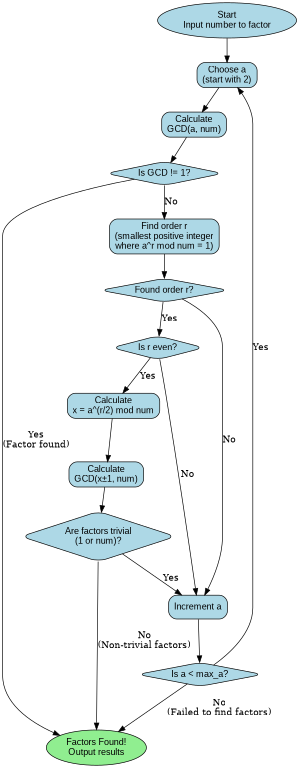

In [3]:
# Install and import required library
%pip install graphviz
import graphviz
import os

try:
    # Create a new directed graph with improved styling
    dot = graphviz.Digraph(comment='Shor\'s Algorithm Flow')
    dot.attr(rankdir='TB', size='8,8')
    
    # Add global graph styling
    dot.attr('node', shape='box', style='rounded,filled', 
            fillcolor='lightblue', fontname='Arial')
    
    # Add nodes with better formatting
    dot.node('A', 'Start\nInput number to factor', shape='oval')
    dot.node('B', 'Choose a\n(start with 2)')
    dot.node('C', 'Calculate\nGCD(a, num)')
    dot.node('D', 'Is GCD != 1?', shape='diamond')
    dot.node('E', 'Find order r\n(smallest positive integer\nwhere a^r mod num = 1)')
    dot.node('F', 'Found order r?', shape='diamond')
    dot.node('G', 'Is r even?', shape='diamond')
    dot.node('H', 'Calculate\nx = a^(r/2) mod num')
    dot.node('I', 'Calculate\nGCD(x±1, num)')
    dot.node('J', 'Are factors trivial\n(1 or num)?', shape='diamond')
    dot.node('K', 'Factors Found!\nOutput results', shape='oval', fillcolor='lightgreen')
    dot.node('L', 'Increment a')
    dot.node('M', 'Is a < max_a?', shape='diamond')

    # Add edges with labels
    dot.edge('A', 'B')
    dot.edge('B', 'C')
    dot.edge('C', 'D')
    dot.edge('D', 'E', 'No')
    dot.edge('D', 'K', 'Yes\n(Factor found)')
    dot.edge('E', 'F')
    dot.edge('F', 'G', 'Yes')
    dot.edge('F', 'L', 'No')
    dot.edge('G', 'H', 'Yes')
    dot.edge('G', 'L', 'No')
    dot.edge('H', 'I')
    dot.edge('I', 'J')
    dot.edge('J', 'K', 'No\n(Non-trivial factors)')
    dot.edge('J', 'L', 'Yes')
    dot.edge('L', 'M')
    dot.edge('M', 'B', 'Yes')
    dot.edge('M', 'K', 'No\n(Failed to find factors)')

    # Render the graph with error handling
    try:
        dot.render('shors_algorithm_for_classical_flowchart', format='png', cleanup=True)
        print("Flowchart created successfully!")
        
        # Display the image in the notebook
        from IPython.display import Image
        display(Image('shors_algorithm_for_classical_flowchart.png'))
    except Exception as e:
        print(f"Error rendering the flowchart: {str(e)}")
        print("Please make sure you have Graphviz installed on your system.")
        print("You can install it on Ubuntu/Debian with: sudo apt-get install graphviz")
        
except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("Please ensure graphviz is properly installed and all dependencies are met.")